<a href="https://colab.research.google.com/github/lidapmariyam/ICT/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('/content/Crop_yield')


In [ ]:
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df.shape

(19689, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df.isna().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


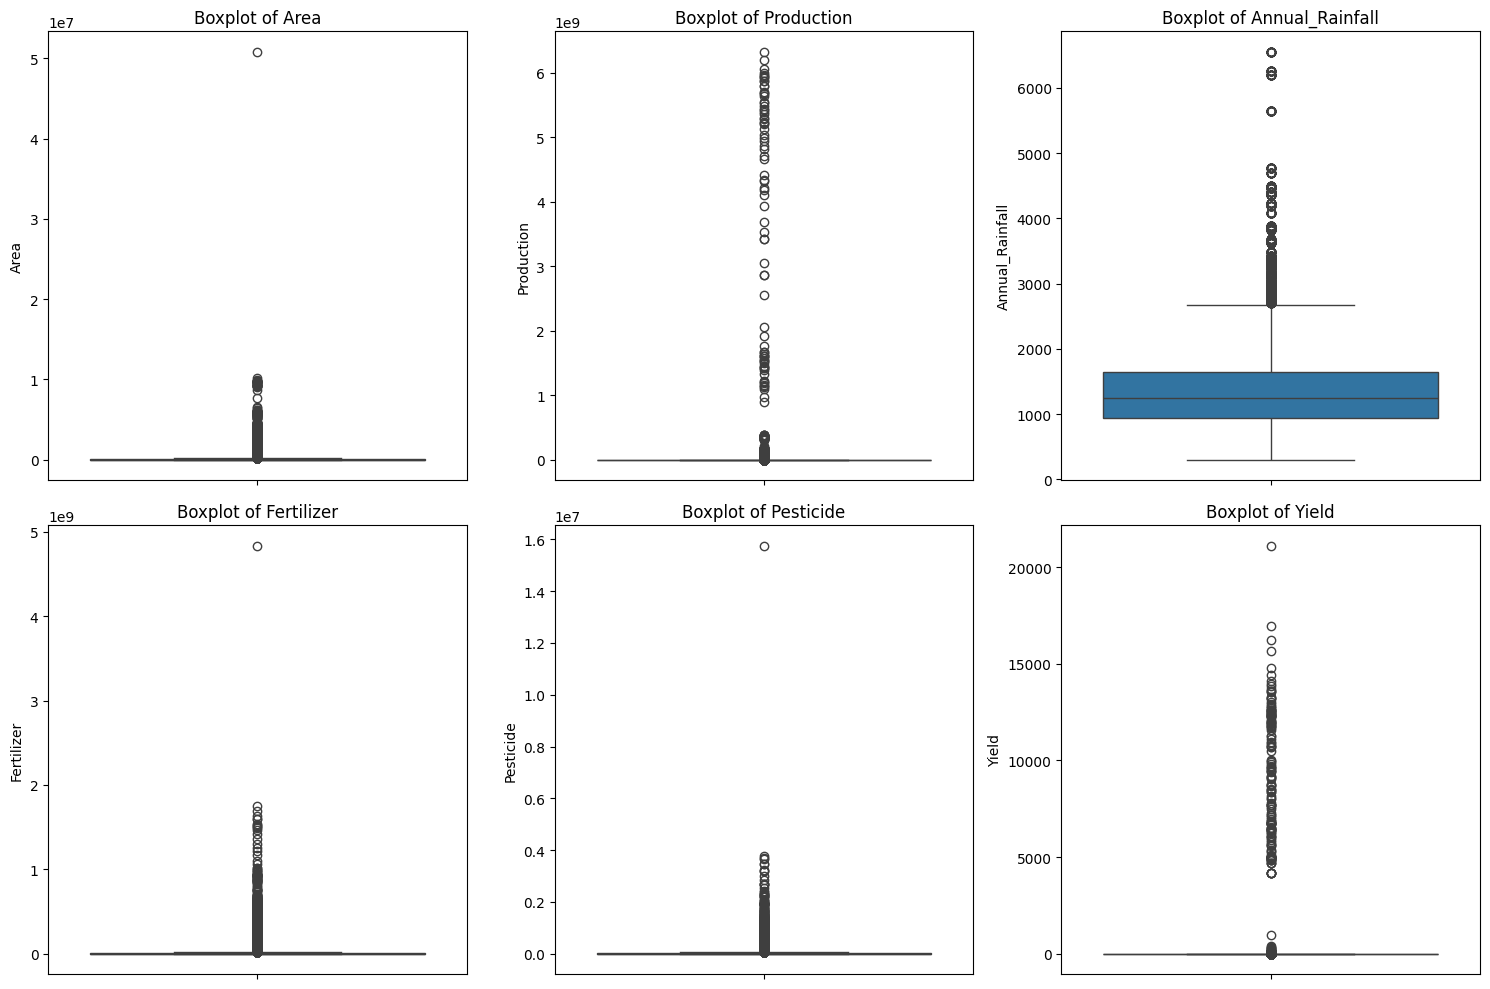

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of numerical columns to visualize
numeric_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Set up the plotting environment
plt.figure(figsize=(15, 10))

# Create boxplots for each numerical column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for subplots
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [ ]:
# Drop irrelevant columns like 'State', 'Season', 'Crop_Year'
columns_to_drop = ['State', 'Season', 'Crop_Year']
data_cleaned = df.drop(columns=columns_to_drop)

# Check the shape and remaining columns
print("Data shape after dropping columns:", data_cleaned.shape)
print("Remaining columns:", data_cleaned.columns)


Data shape after dropping columns: (19689, 7)
Remaining columns: Index(['Crop', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')


In [ ]:

# Function to detect and remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 1st quartile
    Q3 = df[column].quantile(0.75)  # 3rd quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
# Drop rows with missing target variable (Yield)
data_clean = df.dropna(subset=['Yield'])

# Apply IQR method to remove outliers from numerical columns
for column in ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']:
    data_clean = remove_outliers(data_clean, column)

In [ ]:
print("Data after removing outliers:")
print(data_clean.describe())

Data after removing outliers:
         Crop_Year          Area    Production  Annual_Rainfall    Fertilizer  \
count  8779.000000   8779.000000   8779.000000      8779.000000  8.779000e+03   
mean   2009.278278   4389.781170   4319.050803      1368.938709  5.877418e+05   
std       6.309056   5536.829944   7585.475856       547.950813  7.504944e+05   
min    1997.000000      0.500000      0.000000       301.300000  5.417000e+01   
25%    2004.000000    384.500000    266.000000       992.500000  5.297137e+04   
50%    2010.000000   2046.000000   1474.000000      1317.200000  2.842577e+05   
75%    2015.000000   6592.000000   4938.000000      1648.200000  8.737258e+05   
max    2020.000000  34347.000000  97900.000000      2880.200000  4.912995e+06   

         Pesticide        Yield  
count  8779.000000  8779.000000  
mean   1108.728456     0.967723  
std    1318.859106     0.708711  
min       0.090000     0.000000  
25%      99.000000     0.500000  
50%     531.630000     0.777500  
75

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

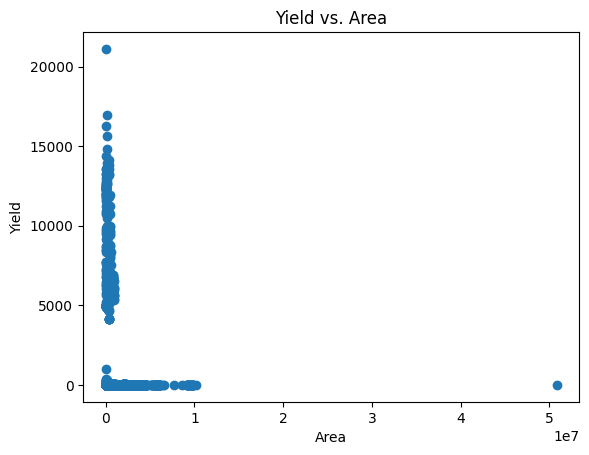

In [ ]:
#Scatter Plot: Yield vs. Area


import matplotlib.pyplot as plt
plt.scatter(df['Area'], df['Yield'])
plt.xlabel('Area')
plt.ylabel('Yield')
plt.title('Yield vs. Area')
plt.show()

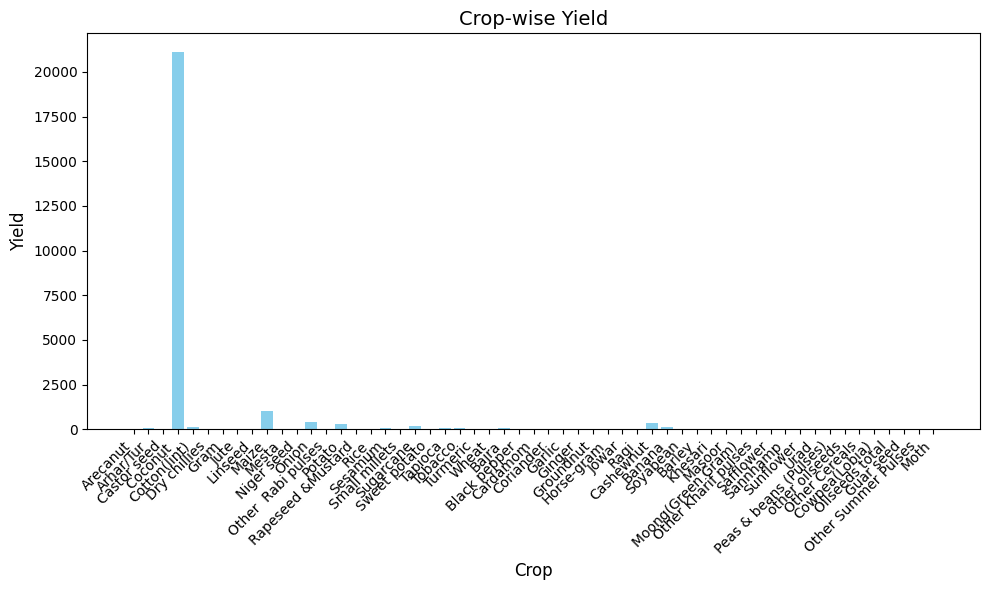

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Create the bar chart
plt.figure(figsize=(10, 6))  # Increase the figure size
plt.bar(df['Crop'], df['Yield'], color='skyblue')
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Yield', fontsize=12)
plt.title('Crop-wise Yield', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


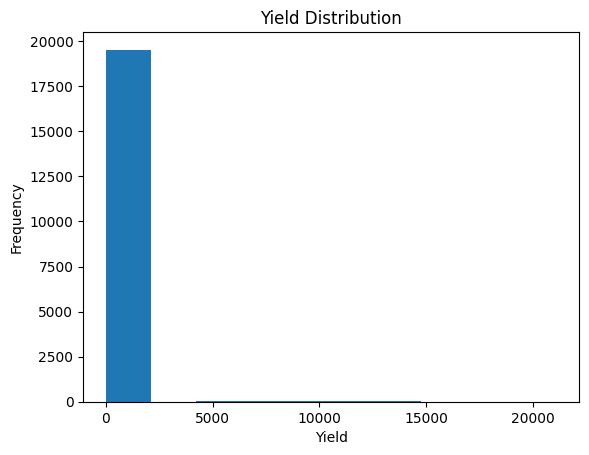

In [ ]:

# Histogram: Yield Distribution

import matplotlib.pyplot as plt
plt.hist(df['Yield'], bins=10)
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Yield Distribution')
plt.show()

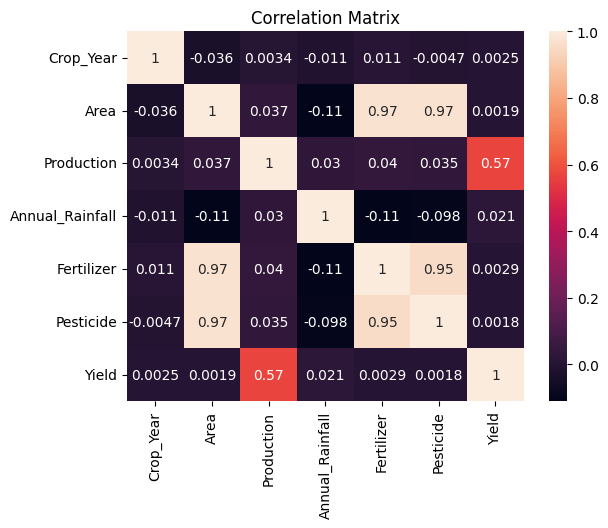

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # Selects only numeric columns

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

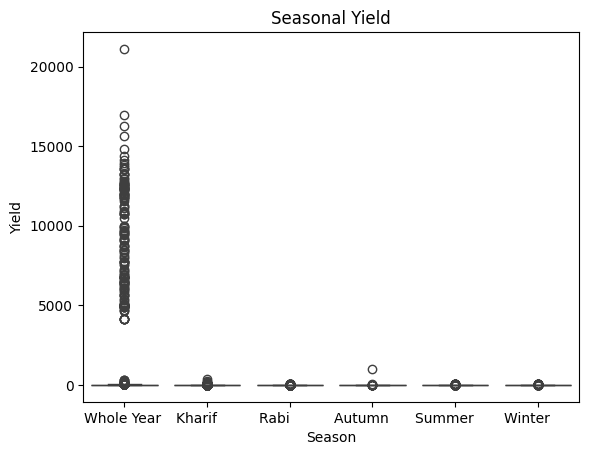

In [ ]:
#Box Plot: Seasonal Yield

import matplotlib.pyplot as plt
sns.boxplot(x='Season', y='Yield', data=df)
plt.title('Seasonal Yield')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

In [ ]:

#  One-hot encoding for categorical columns
categorical_columns = ['Crop', 'Season', 'State']

encoder = OneHotEncoder(sparse_output=False, drop='first')


encoded_categorical = encoder.fit_transform(df[categorical_columns])


encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))


data_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

print(data_encoded.head())

   Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
1       1997   6637.0        4685           2051.4   631643.29    2057.47   
2       1997    796.0          22           2051.4    75755.32     246.76   
3       1997  19656.0   126905000           2051.4  1870661.52    6093.36   
4       1997   1739.0         794           2051.4   165500.63     539.09   

         Yield  Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  ...  State_Odisha  \
0     0.796087             0.0         0.0          0.0  ...           0.0   
1     0.710435             1.0         0.0          0.0  ...           0.0   
2     0.238333             0.0         0.0          0.0  ...           0.0   
3  5238.051739             0.0         0.0          0.0  ...           0.0   
4     0.420909             0.0         0.0          0.0  ...           0.0   

   State_Puducherry  State_Punjab  State_Sikkim  State_Tamil Nadu  \

In [ ]:
#  Scaling the numerical columns
scaler = StandardScaler()
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
print(df.head())


           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [ ]:
# Separate features and target variable
X = data_encoded.drop(columns=['Yield'])
y = data_encoded['Yield']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15751, 94) (3938, 94) (15751,) (3938,)


 Model Selection and Training

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Define feature columns (X) and target column (y)
X = df[['Crop','Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]  # Features
y = df['Yield']  # Target variable

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with RandomForest

# Fit the encoder on the 'Crop' column and transform it
encoded_crop = encoder.fit_transform(X[['Crop']])

# Create a DataFrame from the encoded data
encoded_crop_df = pd.DataFrame(encoded_crop, columns=encoder.get_feature_names_out(['Crop']))

# Concatenate the encoded crop data with the other features
X = pd.concat([X, encoded_crop_df], axis=1)

# Drop the original 'Crop' column as it's now encoded
X = X.drop('Crop', axis=1)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Fit the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optionally, print feature importances
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Mean Squared Error (MSE): 11607.83
R-squared (R²): 0.99
Mean Absolute Error (MAE): 7.34
Area: 0.0307
Production: 0.0332
Annual_Rainfall: 0.0404
Fertilizer: 0.0173
Pesticide: 0.0322
Crop_Arecanut: 0.0000
Crop_Arhar/Tur: 0.0000
Crop_Bajra: 0.0000
Crop_Banana: 0.0000
Crop_Barley: 0.0000
Crop_Black pepper: 0.0000
Crop_Cardamom: 0.0000
Crop_Cashewnut: 0.0000
Crop_Castor seed: 0.0000
Crop_Coconut : 0.8461
Crop_Coriander: 0.0000
Crop_Cotton(lint): 0.0000
Crop_Cowpea(Lobia): 0.0000
Crop_Dry chillies: 0.0000
Crop_Garlic: 0.0000
Crop_Ginger: 0.0000
Crop_Gram: 0.0000
Crop_Groundnut: 0.0000
Crop_Guar seed: 0.0000
Crop_Horse-gram: 0.0000
Crop_Jowar: 0.0000
Crop_Jute: 0.0000
Crop_Khesari: 0.0000
Crop_Linseed: 0.0000
Crop_Maize: 0.0000
Crop_Masoor: 0.0000
Crop_Mesta: 0.0000
Crop_Moong(Green Gram): 0.0000
Crop_Moth: 0.0000
Crop_Niger seed: 0.0000
Crop_Oilseeds total: 0.0000
Crop_Onion: 0.0000
Crop_Other  Rabi pulses: 0.0000
Crop_Other Cereals: 0.0000
Crop_Other Kharif pulses: 0.0000
Crop_Other Summer 

In [ ]:


# 1. XGBoost Regressor
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model using the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost - R-squared (R²): {r2_xgb:.2f}")
print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb:.2f}")




XGBoost - Mean Squared Error (MSE): 72361.01
XGBoost - R-squared (R²): 0.91
XGBoost - Mean Absolute Error (MAE): 15.95


In [ ]:
# 2. LightGBM Regressor
from lightgbm import LGBMRegressor

# Initialize the LightGBM Regressor
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model using the training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f"LightGBM - Mean Squared Error (MSE): {mse_lgbm:.2f}")
print(f"LightGBM - R-squared (R²): {r2_lgbm:.2f}")
print(f"LightGBM - Mean Absolute Error (MAE): {mae_lgbm:.2f}")




/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 15751, number of used features: 59
[LightGBM] [Info] Start training from score 80.138340
LightGBM - Mean Squared Error (MSE): 51517.54
LightGBM - R-squared (R²): 0.94
LightGBM - Mean Absolute Error (MAE): 17.39


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# crop yield model save to pickel

import pickle



# Save the trained model to a pickle file
filename = 'crop_yield_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))



In [ ]:
# download model

from google.colab import files

files.download('crop_yield_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pickle

# Load the dataset
df = pd.read_csv('/content/Crop_yield')

# Features and target variable
features = ['Crop', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
target = 'Yield'  # 'Yield' is the target variable

# One-hot encode the 'Crop' feature
X = pd.get_dummies(df[features])

# Save the column names (important for later use in prediction)
model_columns = X.columns.tolist()
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)

# Define X (features) and y (target)
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a .pkl file
model_filename = 'crop_yield_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model and columns saved as {model_filename} and 'model_columns.pkl'")


Model and columns saved as crop_yield_model.pkl and 'model_columns.pkl'


In [ ]:
# download model columns pkl

files.download('model_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>